In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [2]:
data = pd.read_csv('customer_data.csv')
data.head()

,Age,Income,Gender,Marital Status,Purchase
0,58,93000,Male,Married,1
1,25,48785,Female,Married,1
2,19,62504,Female,Married,1
3,65,27331,Female,Single,0
4,35,50021,Female,Married,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             100 non-null    int64 
 1   Income          100 non-null    int64 
 2   Gender          100 non-null    object
 3   Marital Status  100 non-null    object
 4   Purchase        100 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


In [4]:
pd.get_dummies(data.Gender)

,Female,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
95,1,0
96,0,1
97,0,1
98,0,1


In [5]:
data = data.join(pd.get_dummies(data.Gender)).drop(['Gender'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             100 non-null    int64 
 1   Income          100 non-null    int64 
 2   Marital Status  100 non-null    object
 3   Purchase        100 non-null    int64 
 4   Female          100 non-null    uint8 
 5   Male            100 non-null    uint8 
dtypes: int64(3), object(1), uint8(2)
memory usage: 3.4+ KB


In [7]:
pd.get_dummies(data['Marital Status'])

,Married,Single
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
95,1,0
96,0,1
97,0,1
98,0,1


In [8]:
data = data.join(pd.get_dummies(data['Marital Status'])).drop(['Marital Status'], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       100 non-null    int64
 1   Income    100 non-null    int64
 2   Purchase  100 non-null    int64
 3   Female    100 non-null    uint8
 4   Male      100 non-null    uint8
 5   Married   100 non-null    uint8
 6   Single    100 non-null    uint8
dtypes: int64(3), uint8(4)
memory usage: 2.9 KB


In [10]:
X = data.drop(['Purchase'], axis=1)
y = data['Purchase']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

forest = RandomForestClassifier()
forest.fit(X_test, y_test)

RandomForestClassifier()

In [12]:
y_pred = forest.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-score: {f1:}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [14]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

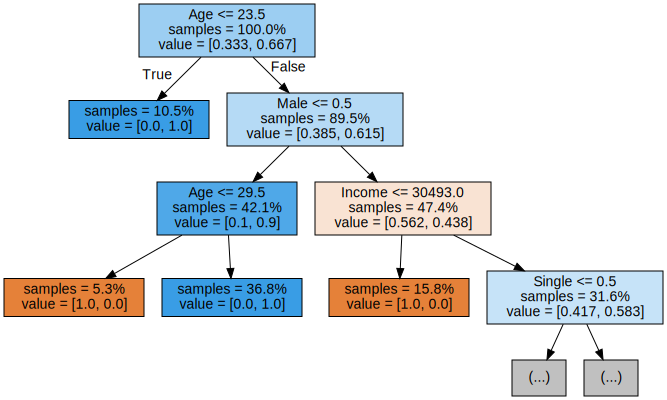

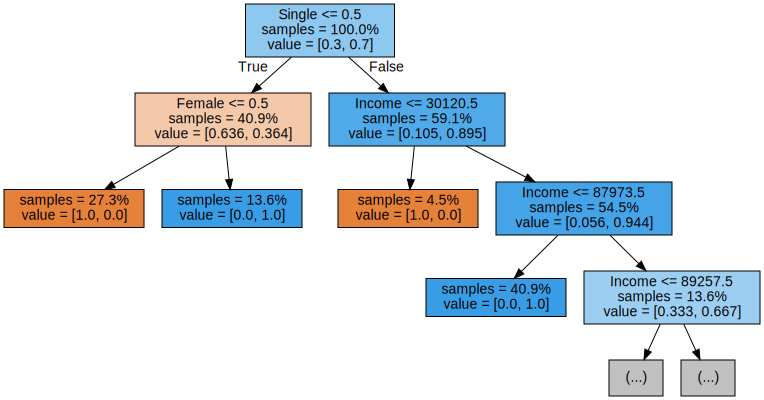

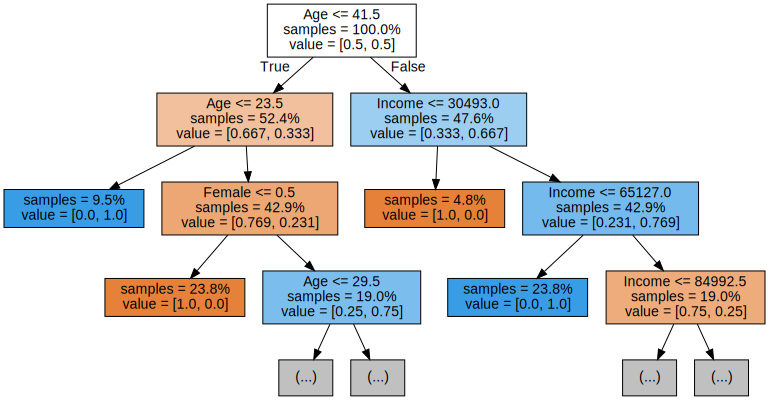

In [15]:
for i in range(3):
    tree = forest.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)